# 信号处理仿真与应用 - 测量和特征提取 - 描述性统计量

## gaussdesign

#### 高斯FIR脉冲整形滤波器设计

用于GSM GMSK数字蜂窝通信系统的高斯滤波器

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def gaussdesign(bt, span=3, sps=2):
    """
    Design a Gaussian FIR Pulse-Shaping Filter.

    Parameters:
        bt (float): 3 dB bandwidth-symbol time product.
        span (int, optional): Total length of the filter in symbols. Default is 3.
        sps (int, optional): Number of samples per symbol. Default is 2.

    Returns:
        h (ndarray): Coefficients of the Gaussian filter.
    """
    # Check if filter order is even
    sps_span = sps * span
    if sps_span % 2 != 0:
        raise ValueError("Filter order must be even.")

    # Calculate filter length
    filt_len = sps_span + 1

    # Convert to t in which to compute the filter coefficients
    t = np.linspace(-span / 2, span / 2, filt_len)

    # Compute alpha
    alpha = np.sqrt(np.log(2) / 2) / bt

    # Compute filter coefficients
    h = (np.sqrt(np.pi) / alpha) * np.exp(-(t * np.pi / alpha) ** 2)

    # Normalize coefficients
    h /= np.sum(h)

    return h
def impz(b, a=[1], N=20, Fs=1):
    """
    Impulse response plot for discrete-time systems.

    Parameters:
        b (array_like): Numerator coefficients of the system.
        a (array_like, optional): Denominator coefficients of the system. Default is [1].
        N (int, optional): Number of points to plot. Default is 20.
        Fs (float, optional): Sampling frequency. Default is 1.

    Returns:
        None (plots the impulse response).
    """
    # Compute impulse response
    impulse = np.zeros(N)
    impulse[0] = 1
    response = np.convolve(b, impulse)

    # Plot impulse response
    n = np.arange(0, len(response)) / Fs
    plt.stem(n, response, basefmt=' ')  # Remove the red baseline
    plt.xlabel('(n) samples')
    plt.ylabel('Amplitude')
    plt.title('Impulse Response')
    plt.xlim([0, 30])  # Limit x-axis from 0 to 30
    plt.grid(True)
    plt.show()


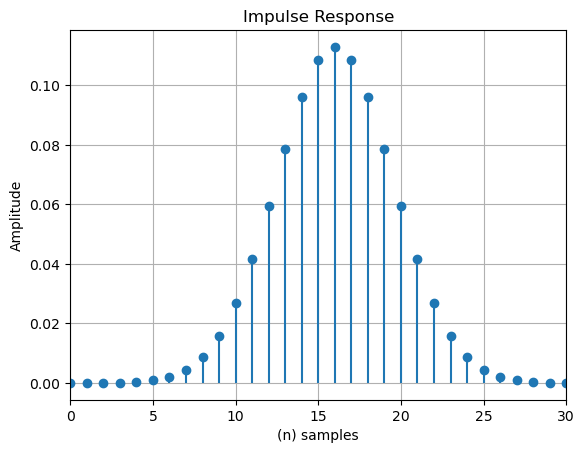

In [6]:
# Parameters
bt = 0.3  # 3-dB bandwidth
symbol_length = 4  # Number of symbols
samples_per_symbol = 8  # Number of samples per symbol

# Generate Gaussian filter coefficients
h = gaussdesign(bt, symbol_length, samples_per_symbol)

# Plot the impulse response
impz(h)